In [1]:
import warnings
warnings.filterwarnings("ignore")
# Wrangling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from env import get_db_url

In [2]:
from sklearn.cluster import KMeans
import prepare 
import scipy.stats as stats

## Wrangle Data

In [3]:
df = pd.read_csv("zillow_data.csv")

In [4]:
df = prepare.drop_null_col(df)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77580 entries, 0 to 77579
Data columns (total 36 columns):
Unnamed: 0                      77580 non-null int64
propertylandusetypeid           77580 non-null float64
heatingorsystemtypeid           49572 non-null float64
parcelid                        77580 non-null int64
id                              77580 non-null int64
bathroomcnt                     77580 non-null float64
bedroomcnt                      77580 non-null float64
buildingqualitytypeid           49810 non-null float64
calculatedbathnbr               76964 non-null float64
calculatedfinishedsquarefeet    77379 non-null float64
finishedsquarefeet12            73924 non-null float64
fips                            77580 non-null float64
fullbathcnt                     76964 non-null float64
latitude                        77580 non-null float64
longitude                       77580 non-null float64
lotsizesquarefeet               69322 non-null float64
propertycountylan

In [6]:
col_obj = ["heatingorsystemtypeid", "parcelid", "id", "fips", "latitude", "longitude", "yearbuilt", "assessmentyear", "censustractandblock", "regionidcity", "regionidzip", "regionidcounty", "propertylandusetypeid"]

df[col_obj] = prepare.change_dtypes(df, col_obj, "object")


In [7]:
df = prepare.impude_values(df)

In [8]:
col_drop = ["propertyzoningdesc", "heatingorsystemtypeid", "calculatedbathnbr", "fullbathcnt", "Unnamed: 0",]

df.drop(columns = col_drop)

,propertylandusetypeid,parcelid,id,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,latitude,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,id.1,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc
0,261,14297519,1727539,3.5,4.0,8.0,3100.0,3100.0,6059,3.36349e+07,...,1023282.0,2016,537569.0,11013.72,6.059063e+13,0,0.025595,2017-01-01,None,Single Family Residential
1,261,17052889,1387261,1.0,2.0,8.0,1465.0,1465.0,6111,3.44493e+07,...,464000.0,2016,376000.0,5672.48,6.111001e+13,1,0.055619,2017-01-01,None,Single Family Residential
2,261,14186244,11677,2.0,3.0,8.0,1243.0,1243.0,6059,3.38862e+07,...,564778.0,2016,479489.0,6488.30,6.059022e+13,2,0.005383,2017-01-01,None,Single Family Residential
3,261,12177905,2288172,3.0,4.0,8.0,2376.0,2376.0,6037,3.42452e+07,...,145143.0,2016,36225.0,1777.51,6.037300e+13,3,-0.103410,2017-01-01,Central,Single Family Residential
4,266,10887214,1970746,3.0,3.0,8.0,1312.0,1312.0,6037,3.41851e+07,...,119407.0,2016,45726.0,1533.89,6.037124e+13,4,0.006940,2017-01-01,Central,Condominium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77575,261,11000655,673515,2.0,2.0,6.0,1286.0,1286.0,6037,3.42454e+07,...,354621.0,2016,283704.0,4478.43,6.037101e+13,77609,0.020615,2017-09-20,Central,Single Family Residential
77576,261,17239384,2968375,2.0,4.0,8.0,1612.0,1612.0,6111,3.43001e+07,...,67205.0,2016,16522.0,1107.48,6.111008e+13,77610,0.013209,2017-09-21,None,Single Family Residential
77577,261,12773139,1843709,1.0,3.0,4.0,1032.0,1032.0,6037,3.40409e+07,...,49546.0,2016,16749.0,876.43,6.037434e+13,77611,0.037129,2017-09-21,Central,Single Family Residential
77578,261,12826780,1187175,2.0,3.0,6.0,1762.0,1762.0,6037,3.39377e+07,...,522000.0,2016,382000.0,6317.15,6.037503e+13,77612,0.007204,2017-09-25,Central,Single Family Residential


In [9]:
df = prepare.wrangle_zillow()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53749 entries, 0 to 53748
Data columns (total 33 columns):
propertylandusetypeid           53749 non-null object
parcelid                        53749 non-null object
id                              53749 non-null object
bathroomcnt                     53749 non-null float64
bedroomcnt                      53749 non-null float64
buildingqualitytypeid           53749 non-null float64
calculatedfinishedsquarefeet    53749 non-null float64
finishedsquarefeet12            53749 non-null float64
fips                            53749 non-null int64
latitude                        53749 non-null object
longitude                       53749 non-null object
lotsizesquarefeet               53749 non-null float64
propertycountylandusecode       53749 non-null object
rawcensustractandblock          53749 non-null float64
regionidcity                    53749 non-null float64
regionidcounty                  53749 non-null object
regionidzip         

In [11]:
df.dropna().fips.value_counts()

6037    33213
6059    15831
6111     4705
Name: fips, dtype: int64

In [12]:
df.shape

(53749, 33)

In [13]:
df.head()

,propertylandusetypeid,parcelid,id,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,latitude,...,landtaxvaluedollarcnt,taxamount,censustractandblock,id.1,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc,state,county
0,261,17052889,1387261,1.0,2.0,8.0,1465.0,1465.0,6111,3.44493e+07,...,376000.0,5672.48,6.111001e+13,1,0.055619,2017-01-01,None,Single Family Residential,CA,Ventura County
1,266,17143294,1447245,2.0,3.0,8.0,1492.0,1492.0,6111,3.423e+07,...,132424.0,3508.10,6.111005e+13,5,-0.020526,2017-01-01,None,Condominium,CA,Ventura County
2,261,17110996,43675,2.5,3.0,8.0,1371.0,1371.0,6111,3.42382e+07,...,99028.0,2204.84,6.111005e+13,15,0.008669,2017-01-02,None,Single Family Residential,CA,Ventura County
3,266,17153706,1431120,2.5,2.0,8.0,1442.0,1442.0,6111,3.41893e+07,...,239000.0,8442.56,6.111004e+13,80,0.027817,2017-01-02,None,Condominium,CA,Ventura County
4,266,17229300,1969702,2.5,2.0,8.0,1164.0,1164.0,6111,3.42812e+07,...,96249.0,2639.36,6.111008e+13,89,-0.017684,2017-01-02,None,Condominium,CA,Ventura County


### Preprocessing

In [14]:
# Create a new column with home age
df["age_home"] = 2017 - df.yearbuilt

In [15]:
#  tax rate 
df["tax_rate"] = df.taxamount / df.taxvaluedollarcnt

In [16]:
df_scaling = df.select_dtypes(exclude="object")

In [17]:
scaler, df_scaled = prepare.min_max_scaler_explore(df_scaling)

In [18]:
df_object = df.select_dtypes("object")

In [19]:
df = pd.concat([df_object, df_scaled], axis=1)

In [20]:
df.head()

,propertylandusetypeid,parcelid,id,latitude,longitude,propertycountylandusecode,regionidcounty,regionidzip,assessmentyear,transactiondate,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,id.1,logerror,age_home,tax_rate
0,261,17052889,1387261,3.44493e+07,-1.19282e+08,1110,2061,97099,2016,2017-01-01,...,0.644928,0.132348,0.683918,0.581059,0.515951,0.001748,0.000000,0.607380,0.355072,0.026690
1,266,17143294,1447245,3.423e+07,-1.18994e+08,1129,2061,97091,2016,2017-01-01,...,0.753623,0.298828,0.486592,0.203443,0.318392,0.001749,0.000052,0.597562,0.246377,0.023093
2,261,17110996,43675,3.42382e+07,-1.19171e+08,1111,2061,97107,2016,2017-01-02,...,0.913043,0.148939,0.289155,0.151669,0.199434,0.001749,0.000180,0.601327,0.086957,0.024277
3,266,17153706,1431120,3.41893e+07,-1.19228e+08,1129,2061,97106,2016,2017-01-02,...,0.934783,0.538617,0.881339,0.368668,0.768796,0.001749,0.001018,0.603795,0.065217,0.030923
4,266,17229300,1969702,3.42812e+07,-1.18778e+08,1129,2061,97118,2016,2017-01-02,...,0.775362,0.217187,0.352357,0.147361,0.239096,0.001749,0.001134,0.597929,0.224638,0.023914


## Exploration

In [21]:
df = df.drop(columns='unitcnt')

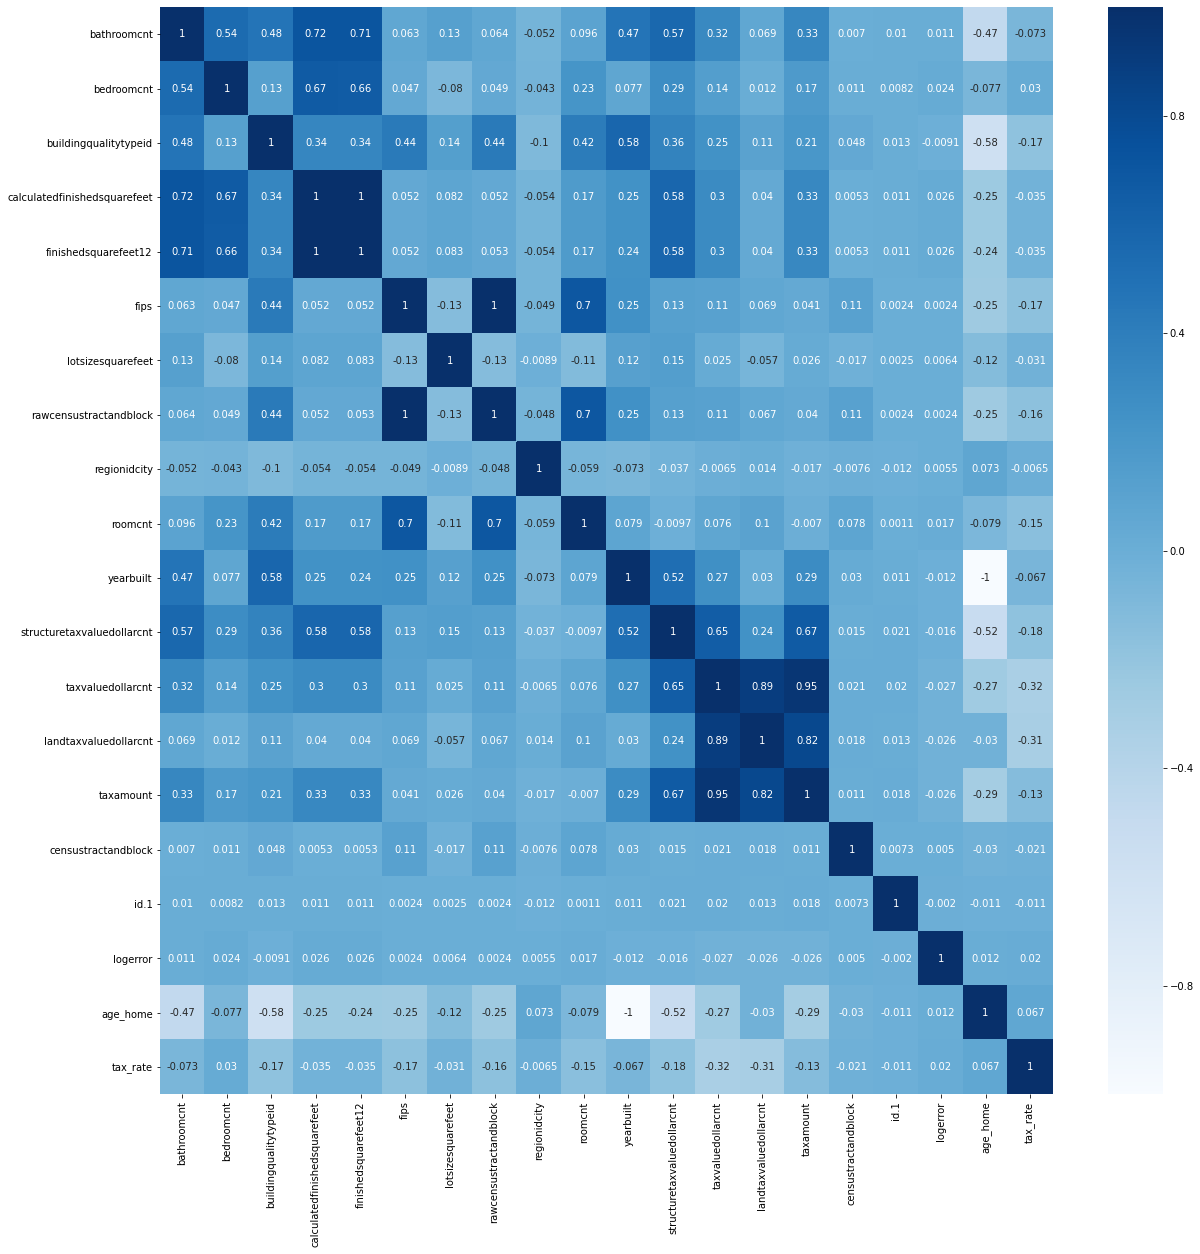

In [22]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap='Blues', annot=True)

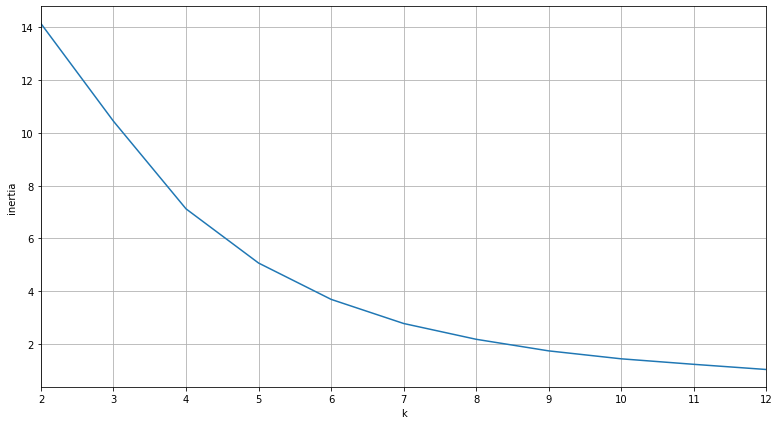

In [23]:
X = df[['logerror']]

def get_inertia(k):
    return KMeans(k).fit(X).inertia_

plt.figure(figsize=(13, 7))
pd.Series({k: get_inertia(k) for k in range(2, 13)}).plot()
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(range(2, 13))
plt.grid()

In [24]:
kmeans = KMeans(5).fit(X)
df['cluster_target'] = kmeans.labels_
df.cluster_target = 'cluster_target' + df.cluster_target.astype(str)

In [25]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,logerror
0,0.643418
1,0.819219
2,0.575666
3,0.299082
4,0.601505


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12136a990>]],
      dtype=object)

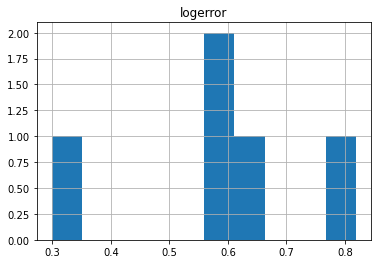

In [26]:
centroids.hist()

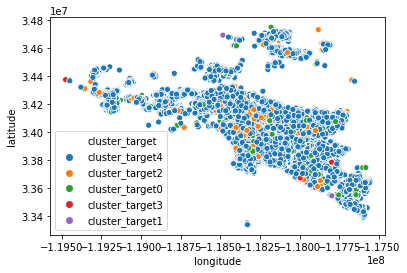

In [27]:
sns.scatterplot(x='longitude', y='latitude',hue="cluster_target", data=df)
plt.show()

Takeaway: It seems vast majority data points' logerror fell into cluster0 which has the lowest log error.

In [28]:
X = df[['latitude', 'longitude', 'finishedsquarefeet12']]
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
kmeans.predict(X)

array([3, 3, 3, ..., 1, 1, 1], dtype=int32)

In [29]:
# Check for the coordinates of the centroids
centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centers

,latitude,longitude,finishedsquarefeet12
0,3.463165e+07,-1.181265e+08,0.217958
1,3.394286e+07,-1.180761e+08,0.168013
2,3.367734e+07,-1.177803e+08,0.183028
3,3.423798e+07,-1.190112e+08,0.194581
4,3.418275e+07,-1.184408e+08,0.186900


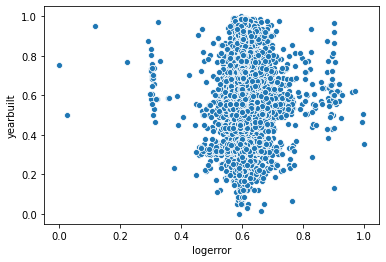

In [30]:
sns.scatterplot(x='logerror',y='yearbuilt', data = df)

In [31]:
X = df[['latitude', 'longitude','finishedsquarefeet12']]

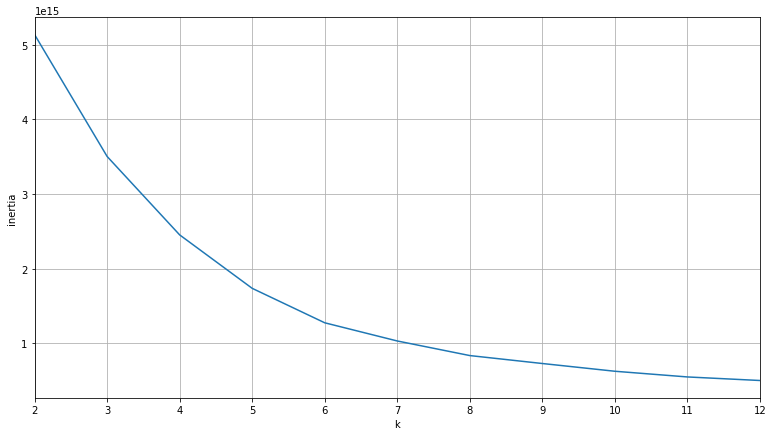

In [32]:
def get_inertia(k):
    kmeans = KMeans(k)
    kmeans.fit(X)
    return kmeans.inertia_

plt.figure(figsize=(13, 7))
pd.Series({k: get_inertia(k) for k in range(2, 13)}).plot()
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(range(2, 13))
plt.grid()

In [33]:
kmeans = KMeans(5)
kmeans.fit(X)
kmeans.predict(X)

array([3, 3, 3, ..., 2, 2, 2], dtype=int32)

In [34]:
df.head()

,propertylandusetypeid,parcelid,id,latitude,longitude,propertycountylandusecode,regionidcounty,regionidzip,assessmentyear,transactiondate,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,id.1,logerror,age_home,tax_rate,cluster_target
0,261,17052889,1387261,3.44493e+07,-1.19282e+08,1110,2061,97099,2016,2017-01-01,...,0.132348,0.683918,0.581059,0.515951,0.001748,0.000000,0.607380,0.355072,0.026690,cluster_target4
1,266,17143294,1447245,3.423e+07,-1.18994e+08,1129,2061,97091,2016,2017-01-01,...,0.298828,0.486592,0.203443,0.318392,0.001749,0.000052,0.597562,0.246377,0.023093,cluster_target4
2,261,17110996,43675,3.42382e+07,-1.19171e+08,1111,2061,97107,2016,2017-01-02,...,0.148939,0.289155,0.151669,0.199434,0.001749,0.000180,0.601327,0.086957,0.024277,cluster_target4
3,266,17153706,1431120,3.41893e+07,-1.19228e+08,1129,2061,97106,2016,2017-01-02,...,0.538617,0.881339,0.368668,0.768796,0.001749,0.001018,0.603795,0.065217,0.030923,cluster_target4
4,266,17229300,1969702,3.42812e+07,-1.18778e+08,1129,2061,97118,2016,2017-01-02,...,0.217187,0.352357,0.147361,0.239096,0.001749,0.001134,0.597929,0.224638,0.023914,cluster_target4


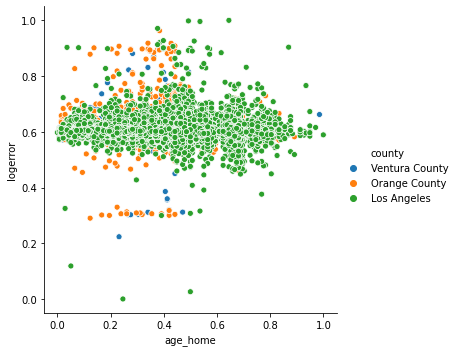

In [35]:
sns.relplot(x="age_home", y="logerror", hue = 'county',data=df)

Takeway: Houses in Orange County and Ventura county have relative younger ages, and higher logerror deviations.

## Hypothesis Testing 
### T-Test
$H_0$: There is no difference of Logerror between LA County and Orange County.

$H_a$: There is a difference of Logerror between LA County and Orange County.

In [36]:
la = df[df.county == "Los Angeles"]
orange = df[df.county == "Orange County"]
ventura = df[df.county == "Ventura County"]

In [37]:
alpha = .01 # confidence level of .99

t, p = stats.ttest_ind(la.logerror, orange.logerror)
print(p)

if p < alpha:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

0.1925589744753555
Failed to reject the null hypothesis


$H_0$: There is no difference of Logerror between LA County and Ventura County.

$H_a$: There is a difference of Logerror between LA County and Ventura County.

In [38]:
alpha = .01 

t, p = stats.ttest_ind(la.logerror, ventura.logerror)
print(p)
if p < alpha:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

0.8259013748159818
Failed to reject the null hypothesis


$H_0$: There is no difference of Logerror between Orange County and Ventura County.

$H_a$: There is a difference of Logerror between Orange County and Ventura County.

In [39]:
alpha = .01 

t, p = stats.ttest_ind(orange.logerror, ventura.logerror)
print(p)
if p < alpha:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

0.5892719213656056
Failed to reject the null hypothesis


Insights drawn from the above visualization and hypothesis testing, through visualization, we thougt there's a difference among different counties in regard to logerror, after we did hypothesis testing, we failed to reject the null hypothesises, which means there is no statistic significant difference of logerrors between LA, Orange and Ventura County. 

In [40]:
# create taxrate variable
df['taxrate'] = (df.taxamount/df.taxvaluedollarcnt).round(4)

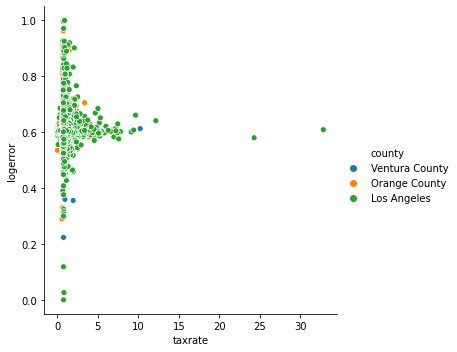

In [41]:
sns.relplot(x="taxrate", y="logerror", hue = 'county',data=df)

No insights drawn from the above chart, seems taxrate 

In [42]:
df.taxrate.isnull().sum() ==0

True

In [43]:
df.logerror.isnull().sum() ==0

True

In [44]:
print(df.taxrate)

0        0.7544
1        0.6543
2        0.6897
3        0.8723
4        0.6786
          ...  
53744    0.8770
53745    0.7443
53746    1.1378
53747    0.7465
53748    0.7986
Name: taxrate, Length: 53749, dtype: float64


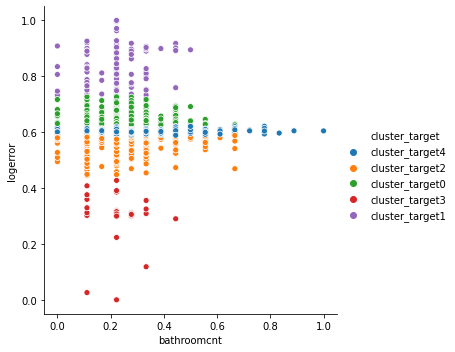

In [45]:
# scatter plot for bathroom and logerror
sns.relplot(x="bathroomcnt", y="logerror", hue='cluster_target',data=df);

## Pearson's Correlation Test

$H_0$: There is a linear correlation between bathroomcnt and logerror.

$H_a$: There is no linear correlation between bathroomcnt and logerror.

In [46]:
alpha = 0.05
r, p = stats.pearsonr(df.bathroomcnt, df.logerror)
r, p

(0.010710212956260866, 0.013026240411187901)

In [47]:
if p < alpha:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the null")

Reject the null hypothesis


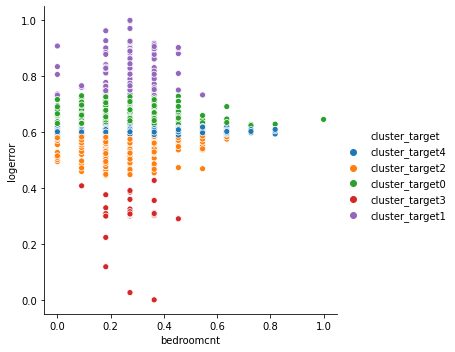

In [48]:
# scatter plot for bathroom and logerror
sns.relplot(x="bedroomcnt", y="logerror",hue='cluster_target', data=df);

$H_0$: There is a linear correlation between bedroomcnt and logerror.

$H_a$: There is no linear correlation between bedroomcnt and logerror.

In [49]:
alpha = 0.05
r, p = stats.pearsonr(df.bedroomcnt, df.logerror)
r, p

(0.023825964569162784, 3.3056273842039224e-08)

In [50]:
if p < alpha:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the null")

Reject the null hypothesis


# Modeling

In [51]:
df = prepare.split_data(df)

In [52]:
train, validate, test = df

In [53]:
predictions = pd.DataFrame({
    'actual_logerror': train.logerror
})
predictions.head()

,actual_logerror
34772,0.600414
30767,0.600773
32136,0.599290
38218,0.595146
23661,0.625131


In [54]:
predictions['baseline'] = predictions.actual_logerror.mean()
predictions.head(3)


,actual_logerror,baseline
34772,0.600414,0.602218
30767,0.600773,0.602218
32136,0.599290,0.602218


In [55]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from math import sqrt

In [56]:
MSE_baseline = mean_squared_error(predictions.actual_logerror, predictions.baseline)
RMSE_baseline = sqrt(MSE_baseline)
print('RMSE_baseline:', RMSE_baseline)

RMSE_baseline: 0.019929162577081768


## Model 1

- Linear regression model with features

In [57]:
X_train = train[['bathroomcnt','bedroomcnt','finishedsquarefeet12']]

In [58]:
y_train = train.logerror

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [60]:
lm1=LinearRegression()
lm1.fit(X_train, y_train)
yhat_lm1=lm1.predict(X_train)
yhat_lm1

array([0.60246385, 0.60162604, 0.60307472, ..., 0.60287372, 0.60175224,
       0.60205396])

In [61]:
MSE_1 = mean_squared_error(yhat_lm1, y_train)
RMSE_1 = sqrt(MSE_1)
print('RMSE_1:' ,RMSE_1)

RMSE_1: 0.01992051654688105


In [62]:
RMSE_baseline < RMSE_1

False

## Model 2

- Decision Tree model with 3 features

In [63]:
tree = DecisionTreeRegressor(max_depth = 6, random_state = 123)
tree.fit(X_train, y_train)
y_pred_t = tree.predict(X_train)

In [64]:
MSE_2 = mean_squared_error(y_train, y_pred_t)
RMSE_2 = sqrt(MSE_2)
print('RMSE_2:',RMSE_2)

RMSE_2: 0.019664423444093974


## Model 3
- RandomForest with 3 features

In [65]:
rf = RandomForestRegressor(max_depth = 8, random_state = 123).fit(X_train, y_train)
y_pred_for = rf.predict(X_train)

In [66]:
MSE_3 = mean_squared_error(y_train, y_pred_for)
RMSE_3 = sqrt(MSE_3)
print('RMSE_3:',RMSE_3)

RMSE_3: 0.01923212963952115


## Model 4

- RandomForest with 5 features(including new features we created)

In [74]:
X_train = train[['bathroomcnt','bedroomcnt','finishedsquarefeet12','age_home','taxvaluedollarcnt']]

In [75]:
y_train = train.logerror

In [76]:
rf = RandomForestRegressor(max_depth = 8, random_state = 123).fit(X_train, y_train)
y_pred_for = rf.predict(X_train)

In [77]:
MSE_4 = mean_squared_error(y_train, y_pred_for)
RMSE_4 = sqrt(MSE_4)
print('RMSE_4:',RMSE_4)

RMSE_4: 0.01871589066843193


In [71]:
features = ['bathroomcnt','bedroomcnt','finishedsquarefeet12']
train_scaled, y_train, validate_scaled, y_validate, test_scaled, y_test = prepare.prepare_for_modeling(df, features)

In [72]:
predictions = pd.DataFrame({"actual": y_train, "baseline": y_train.mean()}) 

In [73]:
predictions.head()

,actual,baseline
34772,0.001594,0.015584
30767,0.004376,0.015584
32136,-0.007127,0.015584
38218,-0.039266,0.015584
23661,0.193301,0.015584
